<a href="https://colab.research.google.com/github/Nakulpradeep94/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Importing library**

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

import lightgbm

import warnings
warnings.filterwarnings('ignore')


# **Mounting drive**

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Coronavirus Tweet Sentiment Analysis/Copy of Coronavirus Tweets.csv', encoding='latin-1')

# Basic Data Analysis

Data dictionary

In [155]:
#Top 5 rows of the dataset
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [156]:
#last 5 rows of the dataset
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe,Negative


In [157]:
#to find columns of the dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [158]:
#to find the number of rows and columns
df.shape

(41157, 6)

In [159]:
# To find the unique values in sentiment column
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [160]:
df['Location'].nunique()

12220

In [161]:
#to get infornation about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


We can see that there are null values present in the location  column as there are only 32567 non values for location with rowsof 41157 values.

# Null Value and Duplicate value

In [162]:
#Checking null value count of each column
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

There are 8590 null values in location column

In [163]:
percentage_null=df['Location'].isnull().sum()*100/len(df)
print("The percentage of null values of location  column is :",percentage_null)

The percentage of null values of location  column is : 20.87129771363316


In [164]:
# checking for duplicate values
df[df.duplicated()].shape

(0, 6)

In [165]:
# checking for duplicate values
len(df[df.duplicated()])

0

We can see from above that there are no duplicate rows for the given dataset

In [166]:
# we remove these columns as they donot provide any information regarding eda or classification
df.drop(['UserName','ScreenName'],axis=1,inplace=True)

In [167]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


# **Exploratory Data Analysis**

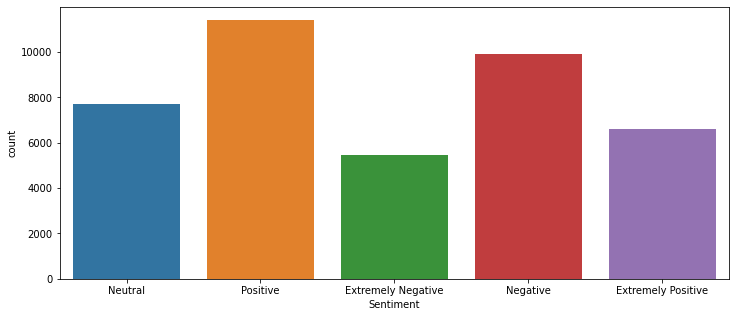

In [168]:
# to get visualisation of the number of different types of sentiment
plt.figure(figsize=[12,5])
sns.countplot(df['Sentiment'])

We can see that the majority sentiment from the tweets are Positive

In [169]:
#Top 5 locations of tweet
location_df=df['Location'].value_counts().head(5)
loc_df = pd.DataFrame(location_df)
loc_df.reset_index(inplace=True)
loc_df = loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
loc_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373


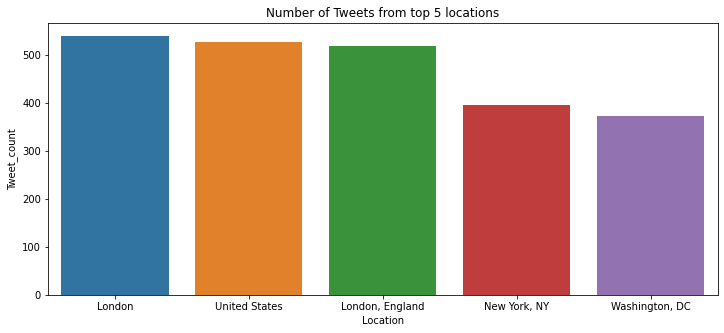

In [170]:
plt.figure(figsize=[12,5])
sns.barplot('Location','Tweet_count',data = loc_df)
plt.title("Number of Tweets from top 5 locations")
plt.show()

All of top 5 tweets come from UK and USA

In [171]:
#checking the dates of tweeting
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

So the tweets are from 16Th March 2020 to 14th April 2020. i.e for a period of 30 days

In [172]:
#to get the number of unique values of date
df['TweetAt'].nunique()

30

In [173]:
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

People tweeted most during 20-03-2020 and least during 28-03-2020

Text(0.5, 1.0, 'Number of tweets with repect to date')

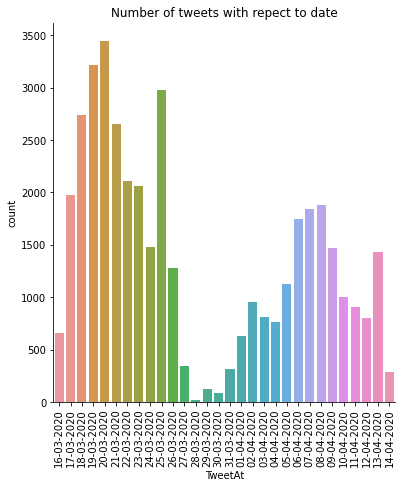

In [174]:

sns.catplot(x='TweetAt',height=6,kind='count',data=df)
plt.xticks(rotation = 90)
plt.title("Number of tweets with repect to date")

# **Tweet Preprocessing**

In [175]:
#pd.set_option('display.max_columns', None)

In [176]:
#pd.options.display.width = None

In [177]:
#To view entire text
pd.set_option('display.max_colwidth', None)

In [178]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


Removing urls

In [179]:
#removing urls from dataset
df['cleaned_tweet'] = df['OriginalTweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')

In [180]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


Removing values with @ attached

In [181]:
#importing regular expression
import re

In [182]:
#removing re with @names
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: re.sub('@[\w]*',' ', str(x)))

In [183]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**removing punctuation and special character**

In [184]:
# remove special characters, numbers, punctuations
#df['cleaned_tweet'] = df['cleaned_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [185]:
# remove special characters, numbers, punctuations
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [186]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe COVID france COVID COVID coronavirus confinement Confinementotal ConfinementGeneral
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,Me ready to go at supermarket during the COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The coronavirus is a serious thing but please don t panic It causes shortage CoronavirusFrance restezchezvous StayAtHome confinement


**considering words with length greater than or equal to 3**

In [187]:
# to consider only words with length greater than or equal to 3 
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >2]))

In [188]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe COVID france COVID COVID coronavirus confinement Confinementotal ConfinementGeneral
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket during the COVID outbreak Not because paranoid but because food stock litteraly empty The coronavirus serious thing but please don panic causes shortage CoronavirusFrance restezchezvous StayAtHome confinement


**extract the stop words**

In [189]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [190]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [191]:
len(sw_nltk)

179

In [192]:
imp_words=['not','no','nor','don',"don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",'isn', "isn't",'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't"]

In [193]:
sw_nltk=[x for x in sw_nltk if x not in imp_words]

In [194]:
len(sw_nltk)

140

Function  to remove stop words


In [195]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw_nltk]
    # joining the list of words with space separator
    return " ".join(text)

In [196]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(stopwords)

In [197]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds not order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empty please don panic enough food everyone not take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket covid outbreak not paranoid food stock litteraly empty coronavirus serious thing please don panic causes shortage coronavirusfrance restezchezvous stayathome confinement


lemmatisation

In [198]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def convert(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))

    return ' '.join(lemmatized_text)



In [199]:
#df['cleaned_tweet']=df['cleaned_tweet'].apply(lambda x: lemmatize(x))

In [200]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: convert(x))

In [201]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shop account poss adequate supply regular meds not order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disable dedicate shop hours amid covid outbreak
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empty please don panic enough food everyone not take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket covid outbreak not paranoid food stock litteraly empty coronavirus serious thing please don panic cause shortage coronavirusfrance restezchezvous stayathome confinement


Before stemming let us try to find common words for the data and each of these sentiments

Creating word cloud

In [202]:
from wordcloud import WordCloud

To see the most commonly used words

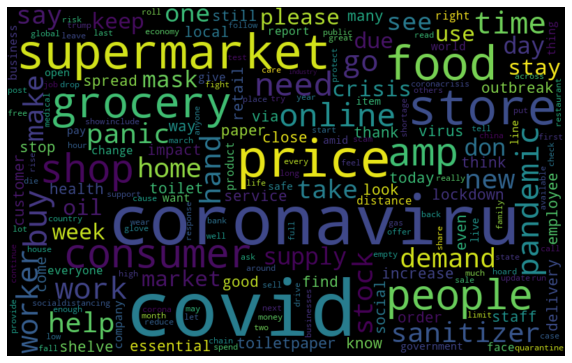

In [203]:
# create text from all tweets
all_words = ' '.join([text for text in df['cleaned_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="Bilinear")
plt.axis('off')
plt.show()

These are the most common words

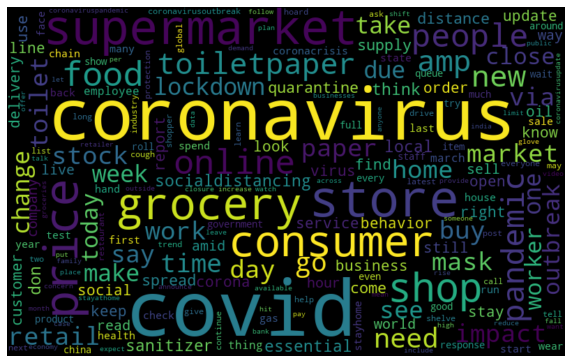

In [204]:
# create text from just neutral sentiment
neutral_words = ' '.join([text for text in df['cleaned_tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

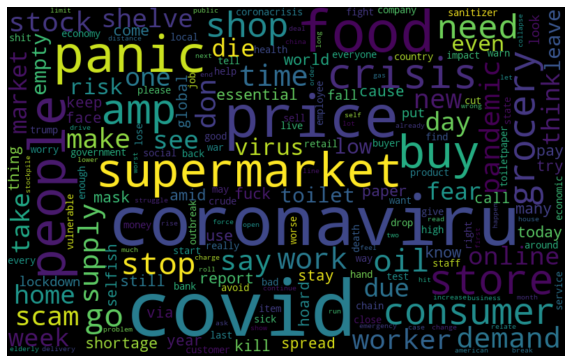

In [205]:
# create text from just Extremely Negative sentiment
words = ' '.join([text for text in df['cleaned_tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

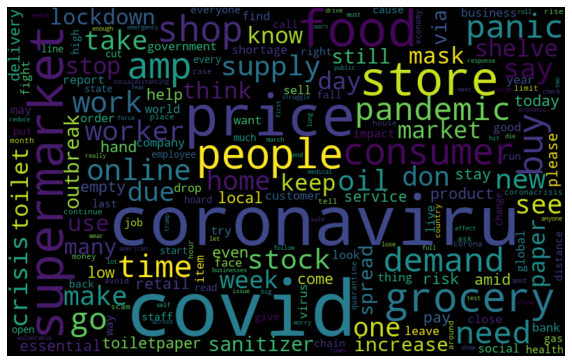

In [206]:
# create text from just Extremely Negative sentiment
words = ' '.join([text for text in df['cleaned_tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

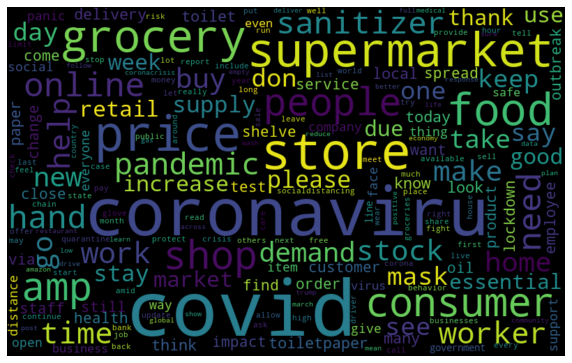

In [207]:
# create text from just Extremely Negative sentiment
words = ' '.join([text for text in df['cleaned_tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

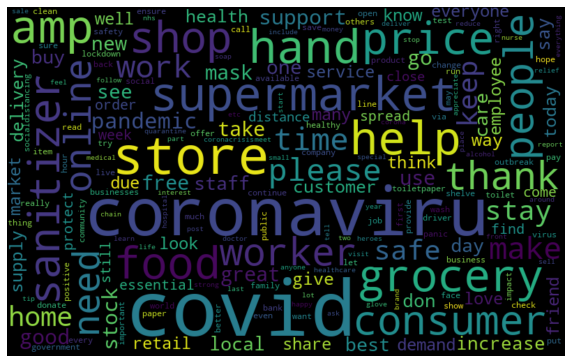

In [208]:
# create text from just Extremely Negative sentiment
neutral_words = ' '.join([text for text in df['cleaned_tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [209]:
removable_words=['covid','supermarket','price','grocery','coronavirus','consumer','coronaviru','market']

In [210]:
def removable(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in removable_words]
    # joining the list of words with space separator
    return " ".join(text)

In [211]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(removable)

**Stemming**

In [212]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [213]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(stemming)

In [214]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med not order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,australia woolworth give elder disabl dedic shop hour amid outbreak
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empti pleas don panic enough food everyon not take need stay calm stay safe franc confin confinementot confinementgener
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,readi outbreak not paranoid food stock litterali empti serious thing pleas don panic caus shortag coronavirusfr restezchezv stayathom confin


In [216]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med not order
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,australia woolworth give elder disabl dedic shop hour amid outbreak
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empti pleas don panic enough food everyon not take need stay calm stay safe franc confin confinementot confinementgener
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,readi outbreak not paranoid food stock litterali empti serious thing pleas don panic caus shortag coronavirusfr restezchezv stayathom confin


Feature selection

In [217]:
new_df=df[['cleaned_tweet','Sentiment']]

In [218]:
new_df.head()

,cleaned_tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med not order,Positive
2,australia woolworth give elder disabl dedic shop hour amid outbreak,Positive
3,food stock not one empti pleas don panic enough food everyon not take need stay calm stay safe franc confin confinementot confinementgener,Positive
4,readi outbreak not paranoid food stock litterali empti serious thing pleas don panic caus shortag coronavirusfr restezchezv stayathom confin,Extremely Negative


In [219]:
new_df[new_df['cleaned_tweet']!='']

,cleaned_tweet,Sentiment
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med not order,Positive
2,australia woolworth give elder disabl dedic shop hour amid outbreak,Positive
3,food stock not one empti pleas don panic enough food everyon not take need stay calm stay safe franc confin confinementot confinementgener,Positive
4,readi outbreak not paranoid food stock litterali empti serious thing pleas don panic caus shortag coronavirusfr restezchezv stayathom confin,Extremely Negative
5,news region first confirm case come sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good report,Positive
...,...,...
41152,airlin pilot offer stock shelv lockdown,Neutral
41153,respons complaint not provid cite relat delay yet prompt reject polici tat way,Extremely Negative
41154,know get tough ration toilet paper toiletpap martinsvill help,Positive
41155,wrong smell hand sanit start turn,Neutral


In [220]:
new_df=new_df[new_df['cleaned_tweet']!='']

In [221]:
new_df.head()

,cleaned_tweet,Sentiment
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med not order,Positive
2,australia woolworth give elder disabl dedic shop hour amid outbreak,Positive
3,food stock not one empti pleas don panic enough food everyon not take need stay calm stay safe franc confin confinementot confinementgener,Positive
4,readi outbreak not paranoid food stock litterali empti serious thing pleas don panic caus shortag coronavirusfr restezchezv stayathom confin,Extremely Negative
5,news region first confirm case come sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good report,Positive


In [222]:
new_df.shape

(41115, 2)

In [223]:
new_df.head()

,cleaned_tweet,Sentiment
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med not order,Positive
2,australia woolworth give elder disabl dedic shop hour amid outbreak,Positive
3,food stock not one empti pleas don panic enough food everyon not take need stay calm stay safe franc confin confinementot confinementgener,Positive
4,readi outbreak not paranoid food stock litterali empti serious thing pleas don panic caus shortag coronavirusfr restezchezv stayathom confin,Extremely Negative
5,news region first confirm case come sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good report,Positive


In [224]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE"]
metrics_df = pd.DataFrame(columns = column_names)

In [225]:
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred,average='weighted'),
                  'PRECISION':precision_score(y_test, y_pred,average='weighted'),
                  'F1-SCORE':f1_score(y_test, y_pred,average='weighted')}
                  ,ignore_index=True)
  return df

Train test split

In [226]:
#assign X as a independent variable and y as a dependent variable
X = new_df['cleaned_tweet']
y = new_df['Sentiment']
#spliting dataset into training and testing 

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [228]:
x_train.head()

16052                                                           food drug administr approv first rapid diagnost test detect time minut unitedst struggl meet demand test
12730                                                            think store stock issu wrong guy need gamifi form team neighbor start store scaveng hunt lockdown bread
34534                                                                        pandem come tight hous explain today isn stop coloradan sell home even still go premium via
39119    happi easter church disregard socialdistanc meet person today good news don lot easter servic onlin might good time church shop church shouldn put peopl danger
20737                                                                             kansa soybean cost dan brien discuss factor influenc soybean compar cost time influenc
Name: cleaned_tweet, dtype: object

In [229]:
x_test.head()

14770                                            say work littl store fresh fruit veg bread milk product daili small instor bakeri stock everi morn much pleas don come shop get angri staff best
30768                             work basi alcohol sanit requir kill self prescrib gin amp tonic everi hour kill corona throat display symptom shall move bond dri martini casino royal gin vodk
17702                                        fmcg cos battl readi logist concern vivek gambhir amp ceo godrej product say despit short term spike demand sector isn immun broader slowdown report
7512                                                      shelv empti local farmer remain open busi fresh produc not farmer help fee local also keep busi go farmer mymdfarm farmersmarket buyloc
20312    near futur till crise curb narendra modi pls exempt month emi citizen india loan person loan request tht financi institut bank take action orpenalti incas peopl not abl pay alreadi pay
Name: cleaned_tweet, dtype: ob

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True,max_df = 0.95,min_df = 1)

In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [232]:
train_vectorized = vectorizer.fit_transform(x_train.values)
test_vectorized = vectorizer.transform(x_test.values)
y_test=y_test.values
y_train=y_train.values                                    

The best parameter is {'alpha': 0.1}
Training accuracy Score    : 0.7574486197251611
Testing accuracy Score : 0.43378329076979205
                    precision    recall  f1-score   support

Extremely Negative       0.27      0.60      0.38       491
Extremely Positive       0.28      0.56      0.38       663
          Negative       0.50      0.39      0.44      2542
           Neutral       0.31      0.63      0.41       772
          Positive       0.62      0.38      0.47      3755

          accuracy                           0.43      8223
         macro avg       0.40      0.51      0.42      8223
      weighted avg       0.51      0.43      0.44      8223



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

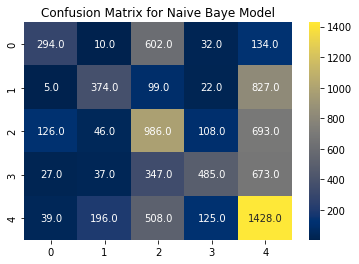

In [233]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [234]:
metrics_df = add_metrics_details("Naive_Baye(Multinomial)-Tfid",y_test,NB_prediction,metrics_df)


The best parameter is {'alpha': 1}
Training accuracy Score    : 0.6834792654748875
Testing accuracy Score : 0.4813328468928615
                    precision    recall  f1-score   support

Extremely Negative       0.22      0.69      0.33       335
Extremely Positive       0.26      0.67      0.37       508
          Negative       0.52      0.41      0.46      2469
           Neutral       0.58      0.65      0.61      1392
          Positive       0.64      0.42      0.50      3519

          accuracy                           0.48      8223
         macro avg       0.44      0.57      0.45      8223
      weighted avg       0.55      0.48      0.49      8223



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

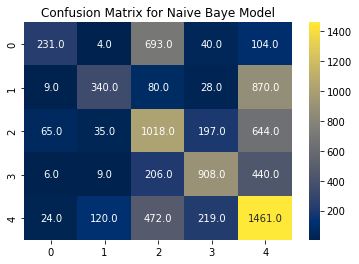

In [235]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import BernoulliNB 

naiveByes_clf = BernoulliNB ()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [236]:
metrics_df = add_metrics_details("Naive_Baye(Bernoulli's)-Tfid",y_test,NB_prediction,metrics_df)

In [237]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE
0,Naive_Baye(Multinomial)-Tfid,0.433783,0.433783,0.487556,0.424926
1,Naive_Baye(Bernoulli's)-Tfid,0.481333,0.481333,0.536516,0.469476


Logistic Regression

In [238]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

In [239]:
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [240]:
#prediction

y_pred = logreg.predict(test_vectorized)

Training accuracy Score    : 0.855162349507479
Testing accuracy Score : 0.5983217803721269
                    precision    recall  f1-score   support

Extremely Negative       0.65      0.61      0.63      1072
Extremely Positive       0.66      0.66      0.66      1327
          Negative       0.52      0.53      0.53      1959
           Neutral       0.64      0.69      0.66      1569
          Positive       0.57      0.55      0.56      2296

          accuracy                           0.60      8223
         macro avg       0.61      0.61      0.61      8223
      weighted avg       0.60      0.60      0.60      8223



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression(Tfid)')

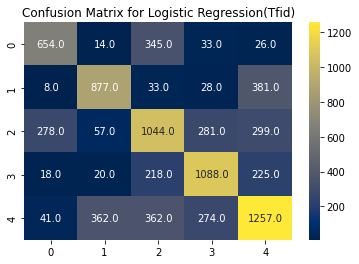

In [241]:
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression(Tfid)")

In [242]:
metrics_df = add_metrics_details("Logistic_Regression-Tfid",y_test,y_pred,metrics_df)

Random Forest

In [243]:
#hyperparameter tuning
classifier = RandomForestClassifier()
parameters = {'n_estimators':[100, 200, 300], 'max_depth':[80, 90, 100, 110]}
rf = GridSearchCV(classifier, param_grid = parameters, cv=5,n_jobs=-1)

In [244]:
#fitting data
rf.fit(train_vectorized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'n_estimators': [100, 200, 300]})

In [245]:
#prediction
y_pred = rf.predict(test_vectorized)

Training accuracy Score    : 0.971786452632859
Testing accuracy Score : 0.5607442539219263
                    precision    recall  f1-score   support

Extremely Negative       0.72      0.38      0.49      1072
Extremely Positive       0.72      0.42      0.53      1327
          Negative       0.51      0.54      0.52      1959
           Neutral       0.67      0.66      0.66      1569
          Positive       0.48      0.68      0.56      2296

          accuracy                           0.56      8223
         macro avg       0.62      0.53      0.55      8223
      weighted avg       0.59      0.56      0.56      8223



Text(0.5, 1.0, 'Confusion Matrix for RandomForest(Tfid)')

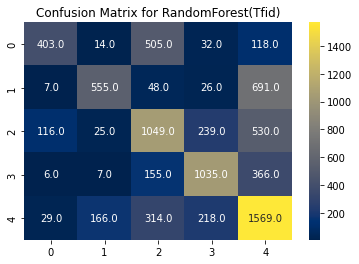

In [246]:
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for RandomForest(Tfid)")

In [247]:
metrics_df = add_metrics_details("Random Forest-Tfid",y_test,y_pred,metrics_df)

XG Boost

In [248]:
#importing the libraries
from xgboost import XGBClassifier
xg_boost = XGBClassifier()

In [249]:
xg_boost.fit(train_vectorized, y_train)

XGBClassifier(objective='multi:softprob')

In [250]:
y_pred = xg_boost.predict(test_vectorized)

Training accuracy Score    : 0.971786452632859
Testing accuracy Score : 0.44959260610482793
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.38      0.47      1072
Extremely Positive       0.68      0.41      0.51      1327
          Negative       0.48      0.35      0.41      1959
           Neutral       0.54      0.28      0.37      1569
          Positive       0.36      0.70      0.47      2296

          accuracy                           0.45      8223
         macro avg       0.53      0.43      0.45      8223
      weighted avg       0.51      0.45      0.44      8223



Text(0.5, 1.0, 'Confusion Matrix for XGBoost(Tfid)')

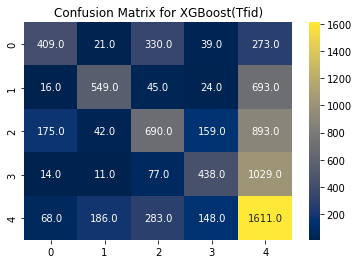

In [251]:
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for XGBoost(Tfid)")

In [252]:
metrics_df = add_metrics_details("XG Boost-Tfid",y_test,y_pred,metrics_df)

Support Vector machines

In [253]:
from sklearn.svm import SVC
#fitting data
svm = SVC(kernel='rbf')
svm.fit(train_vectorized,y_train)

SVC()

In [254]:
y_pred = svm.predict(test_vectorized)

Training accuracy Score    : 0.9524504438769306
Testing accuracy Score : 0.6121853338197738
                    precision    recall  f1-score   support

Extremely Negative       0.74      0.48      0.58      1072
Extremely Positive       0.77      0.54      0.63      1327
          Negative       0.53      0.60      0.57      1959
           Neutral       0.70      0.67      0.68      1569
          Positive       0.55      0.69      0.61      2296

          accuracy                           0.61      8223
         macro avg       0.66      0.59      0.61      8223
      weighted avg       0.63      0.61      0.61      8223



Text(0.5, 1.0, 'Confusion Matrix for SVM(Tfid)')

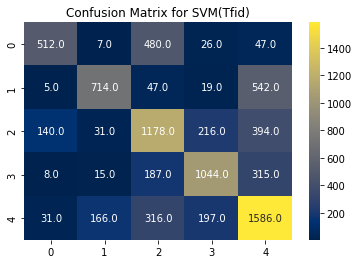

In [255]:
acc = accuracy_score(y_test,y_pred)
train_acc=svm.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for SVM(Tfid)")

In [256]:
metrics_df = add_metrics_details("SVM-Tfid",y_test,y_pred,metrics_df)

**Count Vectorizer**

In [257]:
from sklearn.feature_extraction.text import CountVectorizer

In [258]:
vectorizer = CountVectorizer()

In [259]:
train_vectorized=vectorizer.fit_transform(x_train)
test_vectorized=vectorizer.transform(x_test)

In [260]:
train_vectorized.shape

(32892, 28413)

The best parameter is {'alpha': 1}
Training accuracy Score    : 0.6951538367992217
Testing accuracy Score : 0.46892861486075643
                    precision    recall  f1-score   support

Extremely Negative       0.40      0.59      0.48       730
Extremely Positive       0.43      0.58      0.49       977
          Negative       0.51      0.41      0.45      2440
           Neutral       0.33      0.71      0.45       718
          Positive       0.59      0.40      0.48      3358

          accuracy                           0.47      8223
         macro avg       0.45      0.54      0.47      8223
      weighted avg       0.51      0.47      0.47      8223



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

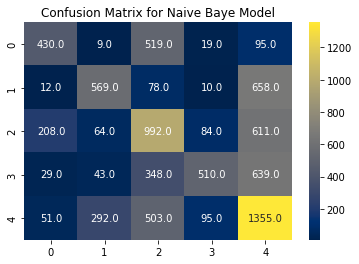

In [261]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [262]:
metrics_df = add_metrics_details("Naive_Baye(Multinomial)-CountVectorizer",y_test,NB_prediction,metrics_df)


The best parameter is {'alpha': 1}
Training accuracy Score    : 0.6834792654748875
Testing accuracy Score : 0.4813328468928615
                    precision    recall  f1-score   support

Extremely Negative       0.22      0.69      0.33       335
Extremely Positive       0.26      0.67      0.37       508
          Negative       0.52      0.41      0.46      2469
           Neutral       0.58      0.65      0.61      1392
          Positive       0.64      0.42      0.50      3519

          accuracy                           0.48      8223
         macro avg       0.44      0.57      0.45      8223
      weighted avg       0.55      0.48      0.49      8223



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

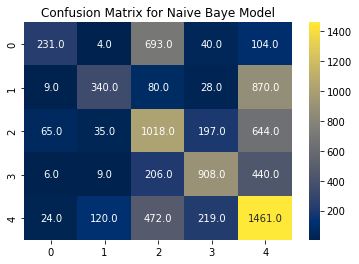

In [263]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import BernoulliNB 

naiveByes_clf = BernoulliNB ()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [264]:
metrics_df = add_metrics_details("Naive_Baye(Bernoulli's)-CountVectorizer",y_test,NB_prediction,metrics_df)

In [265]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE
0,Naive_Baye(Multinomial)-Tfid,0.433783,0.433783,0.487556,0.424926
1,Naive_Baye(Bernoulli's)-Tfid,0.481333,0.481333,0.536516,0.469476
2,Logistic_Regression-Tfid,0.598322,0.598322,0.598229,0.597851
3,Random Forest-Tfid,0.560744,0.560744,0.592310,0.557849
4,XG Boost-Tfid,0.449593,0.449593,0.506464,0.443620
5,SVM-Tfid,0.612185,0.612185,0.632674,0.612880
6,Naive_Baye(Multinomial)-CountVectorizer,0.468929,0.468929,0.515831,0.468301
7,Naive_Baye(Bernoulli's)-CountVectorizer,0.481333,0.481333,0.536516,0.469476


In [266]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

In [267]:
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [268]:
#prediction

y_pred = logreg.predict(test_vectorized)

Training accuracy Score    : 0.8966922047914386
Testing accuracy Score : 0.6174145688921319
                    precision    recall  f1-score   support

Extremely Negative       0.70      0.61      0.65      1072
Extremely Positive       0.70      0.65      0.67      1327
          Negative       0.54      0.54      0.54      1959
           Neutral       0.64      0.72      0.68      1569
          Positive       0.59      0.59      0.59      2296

          accuracy                           0.62      8223
         macro avg       0.63      0.62      0.63      8223
      weighted avg       0.62      0.62      0.62      8223



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression(CountVectorizer)')

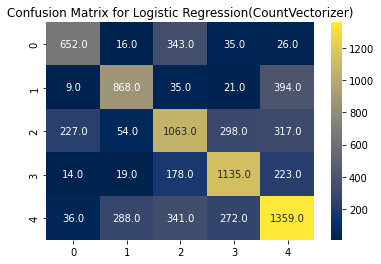

In [269]:
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression(CountVectorizer)")

In [270]:
metrics_df = add_metrics_details("Logistic_Regression-CounntVectorizer",y_test,y_pred,metrics_df)

Random Forest

In [271]:
#hyperparameter tuning
classifier = RandomForestClassifier()
parameters = {'n_estimators':[100, 200, 300], 'max_depth':[80, 90, 100, 110]}
rf = GridSearchCV(classifier, param_grid = parameters, cv=5,n_jobs=-1)

In [ ]:
#fitting data
rf.fit(train_vectorized, y_train)

In [ ]:
#prediction
y_pred = rf.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for RandomForest(CountVectorizer)")

In [ ]:
metrics_df = add_metrics_details("Random Forest-CountVectorizer",y_test,y_pred,metrics_df)

XG Boost

In [ ]:
#importing the libraries
from xgboost import XGBClassifier
xg_boost = XGBClassifier()

In [ ]:
#fitting data

xg_boost.fit(train_vectorized, y_train)

In [ ]:
y_pred = xg_boost.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for XGBoost(Count_Vectorizer)")

In [ ]:
metrics_df = add_metrics_details("XG Boost-(Count_Vectorizer)",y_test,y_pred,metrics_df)

Support Vector machines

In [ ]:
from sklearn.svm import SVC
#fitting data
svm = SVC(kernel='rbf')
svm.fit(train_vectorized,y_train)

In [ ]:
y_pred = svm.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=svm.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for SVM(Count_Vectorizer)")

In [ ]:
metrics_df = add_metrics_details("SVM-(Count_Vectorizer)",y_test,y_pred,metrics_df)

Converting 5 classes to 3 classes

In [ ]:
#function to encode 

def encode(sentiment):
    if sentiment=='Neutral':  
        return 'Neutral'                                                         # Changing neutral labels as Neutral
    elif (sentiment=='Positive') or  (sentiment=='Extremely Positive'):  
        return 'Positive'                                                        # Combining Positive and extremely positive labels as Positive
    else:
        return 'Negative'          #Changing negative and extremely Negative as  Negative

In [ ]:
new_df['Sentiment'] = new_df['Sentiment'].apply(encode)

In [ ]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE"]
new_metrics_df = pd.DataFrame(columns = column_names)

In [ ]:
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred,average='weighted'),
                  'PRECISION':precision_score(y_test, y_pred,average='weighted'),
                  'F1-SCORE':f1_score(y_test, y_pred,average='weighted')}
                  ,ignore_index=True)
  return df

 New Train test split(ie for the labels negative,positive and neutral)

In [ ]:
#assign X as a independent variable and y as a dependent variable
X = new_df['cleaned_tweet']
y = new_df['Sentiment']
#spliting dataset into training and testing 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
train_vectorized=vectorizer.fit_transform(x_train)
test_vectorized=vectorizer.transform(x_test)

In [ ]:
train_vectorized.shape

In [ ]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [ ]:
new_metrics_df = add_metrics_details("Naive_Baye(Multinomial)-CountVectorizer",y_test,NB_prediction,new_metrics_df)


In [ ]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import BernoulliNB 

naiveByes_clf = BernoulliNB ()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [ ]:
new_metrics_df = add_metrics_details("Naive_Baye(Bernoulli's)-CountVectorizer",y_test,NB_prediction,new_metrics_df)

In [ ]:
metrics_df

In [ ]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

In [ ]:
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)

In [ ]:
#prediction

y_pred = logreg.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression(CountVectorizer)")

In [ ]:
new_metrics_df = add_metrics_details("Logistic_Regression-CounntVectorizer",y_test,y_pred,new_metrics_df)

Random Forest

In [ ]:
#hyperparameter tuning
classifier = RandomForestClassifier()
parameters = {'n_estimators':[100, 200, 300], 'max_depth':[80, 90, 100, 110]}
rf = GridSearchCV(classifier, param_grid = parameters, cv=5,n_jobs=-1)

In [ ]:
#fitting data
rf.fit(train_vectorized, y_train)

In [ ]:
#prediction
y_pred = rf.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for RandomForest(CountVectorizer)")

In [ ]:
new_metrics_df = add_metrics_details("Random Forest-CountVectorizer",y_test,y_pred,new_metrics_df)

XG Boost

In [ ]:
#importing the libraries
from xgboost import XGBClassifier
xg_boost = XGBClassifier()

In [ ]:
#fitting data

xg_boost.fit(train_vectorized, y_train)

In [ ]:
y_pred = xg_boost.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=rf.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for XGBoost(Count_Vectorizer)")

In [ ]:
new_metrics_df = add_metrics_details("XG Boost-(Count_Vectorizer)",y_test,y_pred,new_metrics_df)

Support Vector machines

In [ ]:
from sklearn.svm import SVC
#fitting data
svm = SVC(kernel='rbf')
svm.fit(train_vectorized,y_train)

In [ ]:
y_pred = svm.predict(test_vectorized)

In [ ]:
acc = accuracy_score(y_test,y_pred)
train_acc=svm.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for SVM(Count_Vectorizer)")

In [ ]:
new_metrics_df = add_metrics_details("SVM-(Count_Vectorizer)",y_test,y_pred,new_metrics_df)